In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scipy.stats import entropy
import torch

In [2]:
pkl_path = '../logs/cifar10_expt2/sae_train_logs/vanilla_sae/logistic_regression.pkl'

with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

pure_digit_coverage = {}

for sae_name, results in all_results.items():
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]
    
    digit_counts = digits_represented.value_counts().sort_index()
    
    pure_digit_coverage[sae_name] = {
        "n_digits_represented": digit_counts.count(),
        "digit_counts": digit_counts.to_dict()
    }

for sae, info in pure_digit_coverage.items():
    print(f"\n{sae}:")
    print(f"  Unique digits with ≥1 pure neuron: {info['n_digits_represented']}")
    print(f"  Digit breakdown: {info['digit_counts']}")



reanim_vanilla_sae_256_10_best_loss:
  Unique digits with ≥1 pure neuron: 7
  Digit breakdown: {0: 1, 1: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

reanim_vanilla_sae_512_6_best_loss:
  Unique digits with ≥1 pure neuron: 9
  Digit breakdown: {0: 1, 1: 3, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

reanim_vanilla_sae_256_19_best_loss:
  Unique digits with ≥1 pure neuron: 0
  Digit breakdown: {}

vanilla_sae_512_12_best_loss:
  Unique digits with ≥1 pure neuron: 0
  Digit breakdown: {}

vanilla_sae_256_11_best_loss:
  Unique digits with ≥1 pure neuron: 0
  Digit breakdown: {}

reanim_vanilla_sae_512_19_best_loss:
  Unique digits with ≥1 pure neuron: 0
  Digit breakdown: {}

vanilla_sae_512_4_best_loss:
  Unique digits with ≥1 pure neuron: 10
  Digit breakdown: {0: 2, 1: 2, 2: 1, 3: 1, 4: 2, 5: 1, 6: 1, 7: 3, 8: 1, 9: 1}

reanim_vanilla_sae_256_1_best_loss:
  Unique digits with ≥1 pure neuron: 10
  Digit breakdown: {0: 5, 1: 5, 2: 1, 3: 2, 4: 4, 5: 3, 6: 3, 7: 3, 8: 6, 9: 6}

reanim_vanilla_sae_25

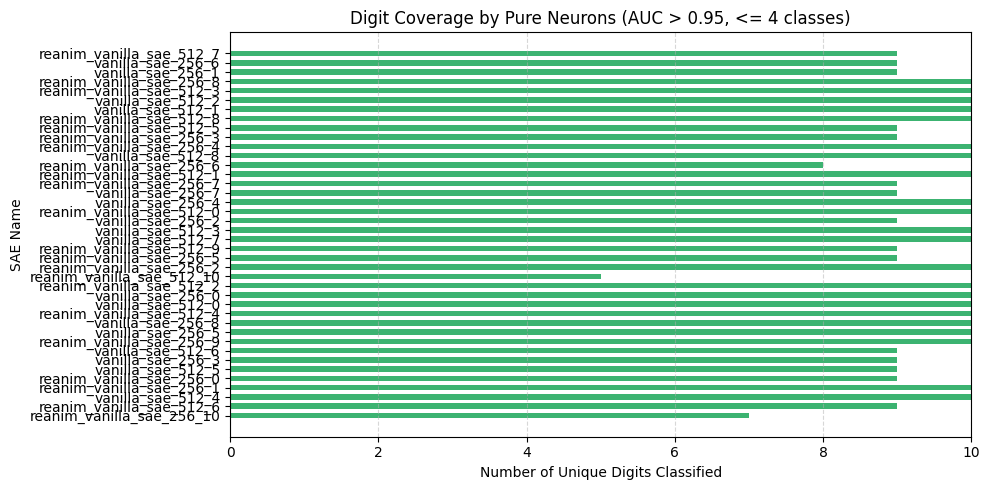

In [3]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() >= 5:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, <= 4 classes)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()

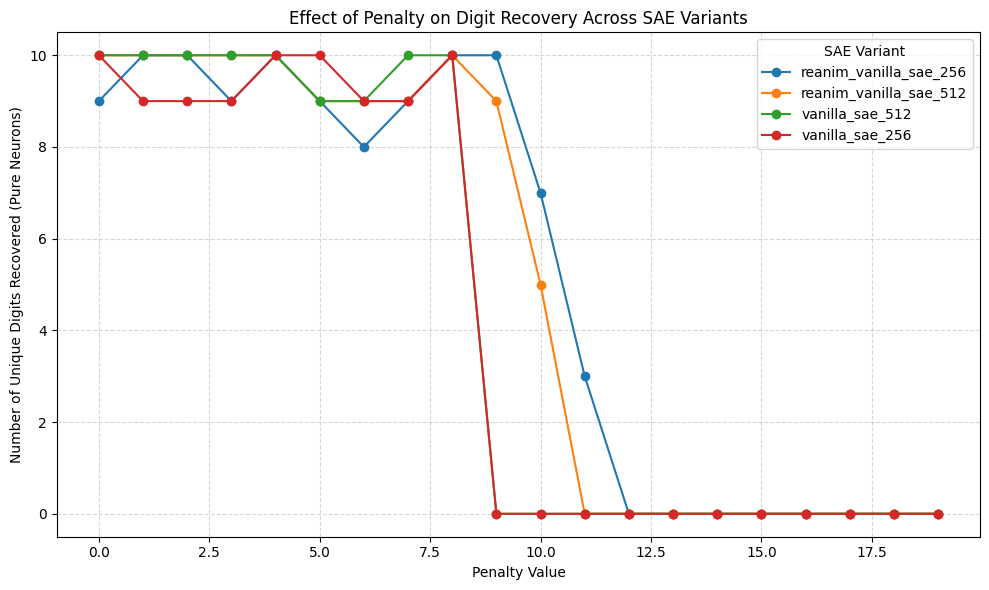

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

grouped_digit_counts = defaultdict(dict)

# Step 1: Parse and group
for sae_name, results in all_results.items():
    if "auc_matrix" not in results or "per_neuron_df" not in results:
        continue

    # Clean up sae_name
    sae_name = sae_name.split('_best_loss')[0]

    try:
        penalty = float(sae_name.split('_')[-1])
        variant = "_".join(sae_name.split('_')[:-1])
    except ValueError:
        continue

    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    grouped_digit_counts[variant][penalty] = digits_represented.nunique()

# Step 2: Plot
plt.figure(figsize=(10, 6))

for variant, penalty_dict in grouped_digit_counts.items():
    penalties = sorted(penalty_dict.keys())
    digits = [penalty_dict[p] for p in penalties]

    # Always plot raw data with markers
    plt.plot(penalties, digits, marker='o', label=variant)

plt.xlabel("Penalty Value")
plt.ylabel("Number of Unique Digits Recovered (Pure Neurons)")
plt.title("Effect of Penalty on Digit Recovery Across SAE Variants")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="SAE Variant")
plt.tight_layout()
plt.show()


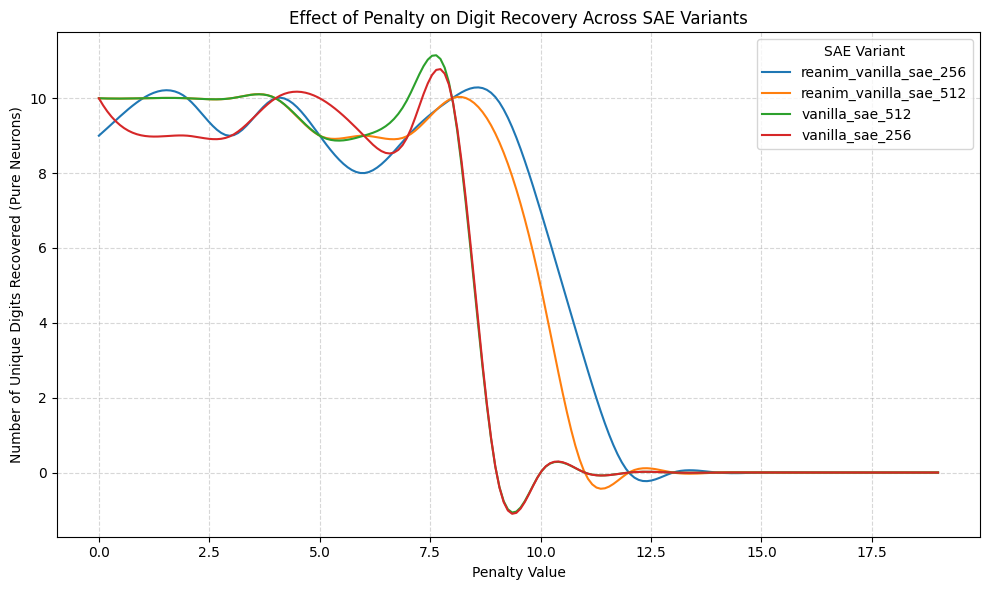

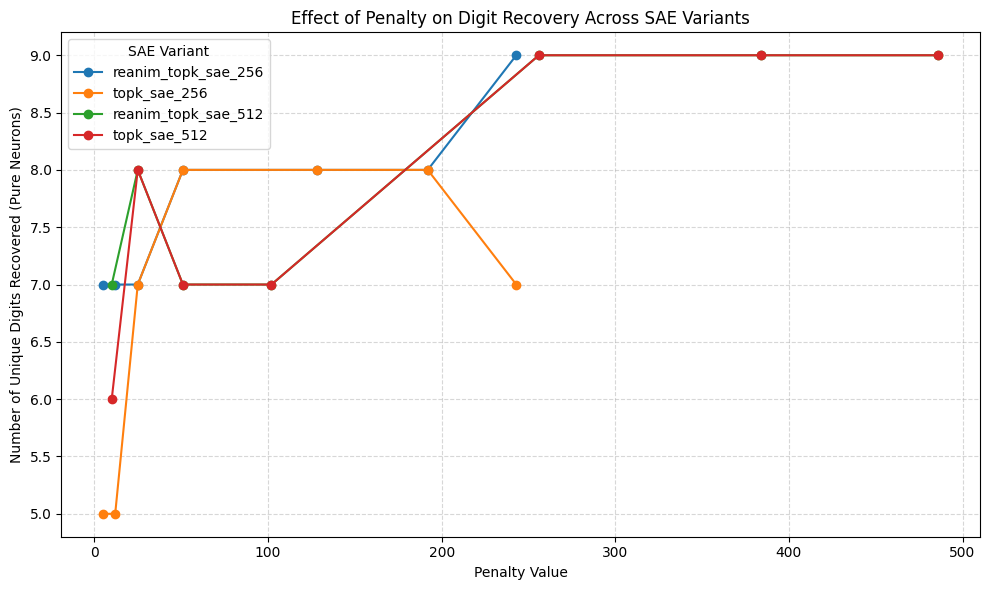

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

pkl_path = '../logs/cifar10_expt2/sae_train_logs/topk_sae/logistic_regression.pkl'

with open(pkl_path, "rb") as f:
    all_results_topk = pickle.load(f)

grouped_digit_counts = defaultdict(dict)

# Step 1: Parse and group
for sae_name, results in all_results_topk.items():
    if "auc_matrix" not in results or "per_neuron_df" not in results:
        continue

    # Clean up sae_name
    sae_name = sae_name.split('_best_loss')[0]

    try:
        penalty = float(sae_name.split('_')[-1])
        variant = "_".join(sae_name.split('_')[:-1])
    except ValueError:
        continue

    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    grouped_digit_counts[variant][penalty] = digits_represented.nunique()

# Step 2: Plot
plt.figure(figsize=(10, 6))

for variant, penalty_dict in grouped_digit_counts.items():
    penalties = sorted(penalty_dict.keys())
    digits = [penalty_dict[p] for p in penalties]

    # Always plot raw data with markers
    plt.plot(penalties, digits, marker='o', label=variant)

plt.xlabel("Penalty Value")
plt.ylabel("Number of Unique Digits Recovered (Pure Neurons)")
plt.title("Effect of Penalty on Digit Recovery Across SAE Variants")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="SAE Variant")
plt.tight_layout()
plt.show()


Running: reanim_vanilla_sae_256_10_best_loss
['vanilla', 'sae', '256', '10']
Running: reanim_vanilla_sae_512_6_best_loss
['vanilla', 'sae', '512', '6']
Running: reanim_vanilla_sae_256_19_best_loss
['vanilla', 'sae', '256', '19']
Running: vanilla_sae_512_12_best_loss
['vanilla', 'sae', '512', '12']
Running: vanilla_sae_256_11_best_loss
['vanilla', 'sae', '256', '11']
Running: reanim_vanilla_sae_512_19_best_loss
['vanilla', 'sae', '512', '19']
Running: vanilla_sae_512_4_best_loss
['vanilla', 'sae', '512', '4']
Running: reanim_vanilla_sae_256_1_best_loss
['vanilla', 'sae', '256', '1']
Running: reanim_vanilla_sae_256_0_best_loss
['vanilla', 'sae', '256', '0']
Running: reanim_vanilla_sae_512_17_best_loss
['vanilla', 'sae', '512', '17']
Running: reanim_vanilla_sae_256_15_best_loss
['vanilla', 'sae', '256', '15']
Running: vanilla_sae_512_5_best_loss
['vanilla', 'sae', '512', '5']
Running: reanim_vanilla_sae_256_12_best_loss
['vanilla', 'sae', '256', '12']
Running: vanilla_sae_256_3_best_loss


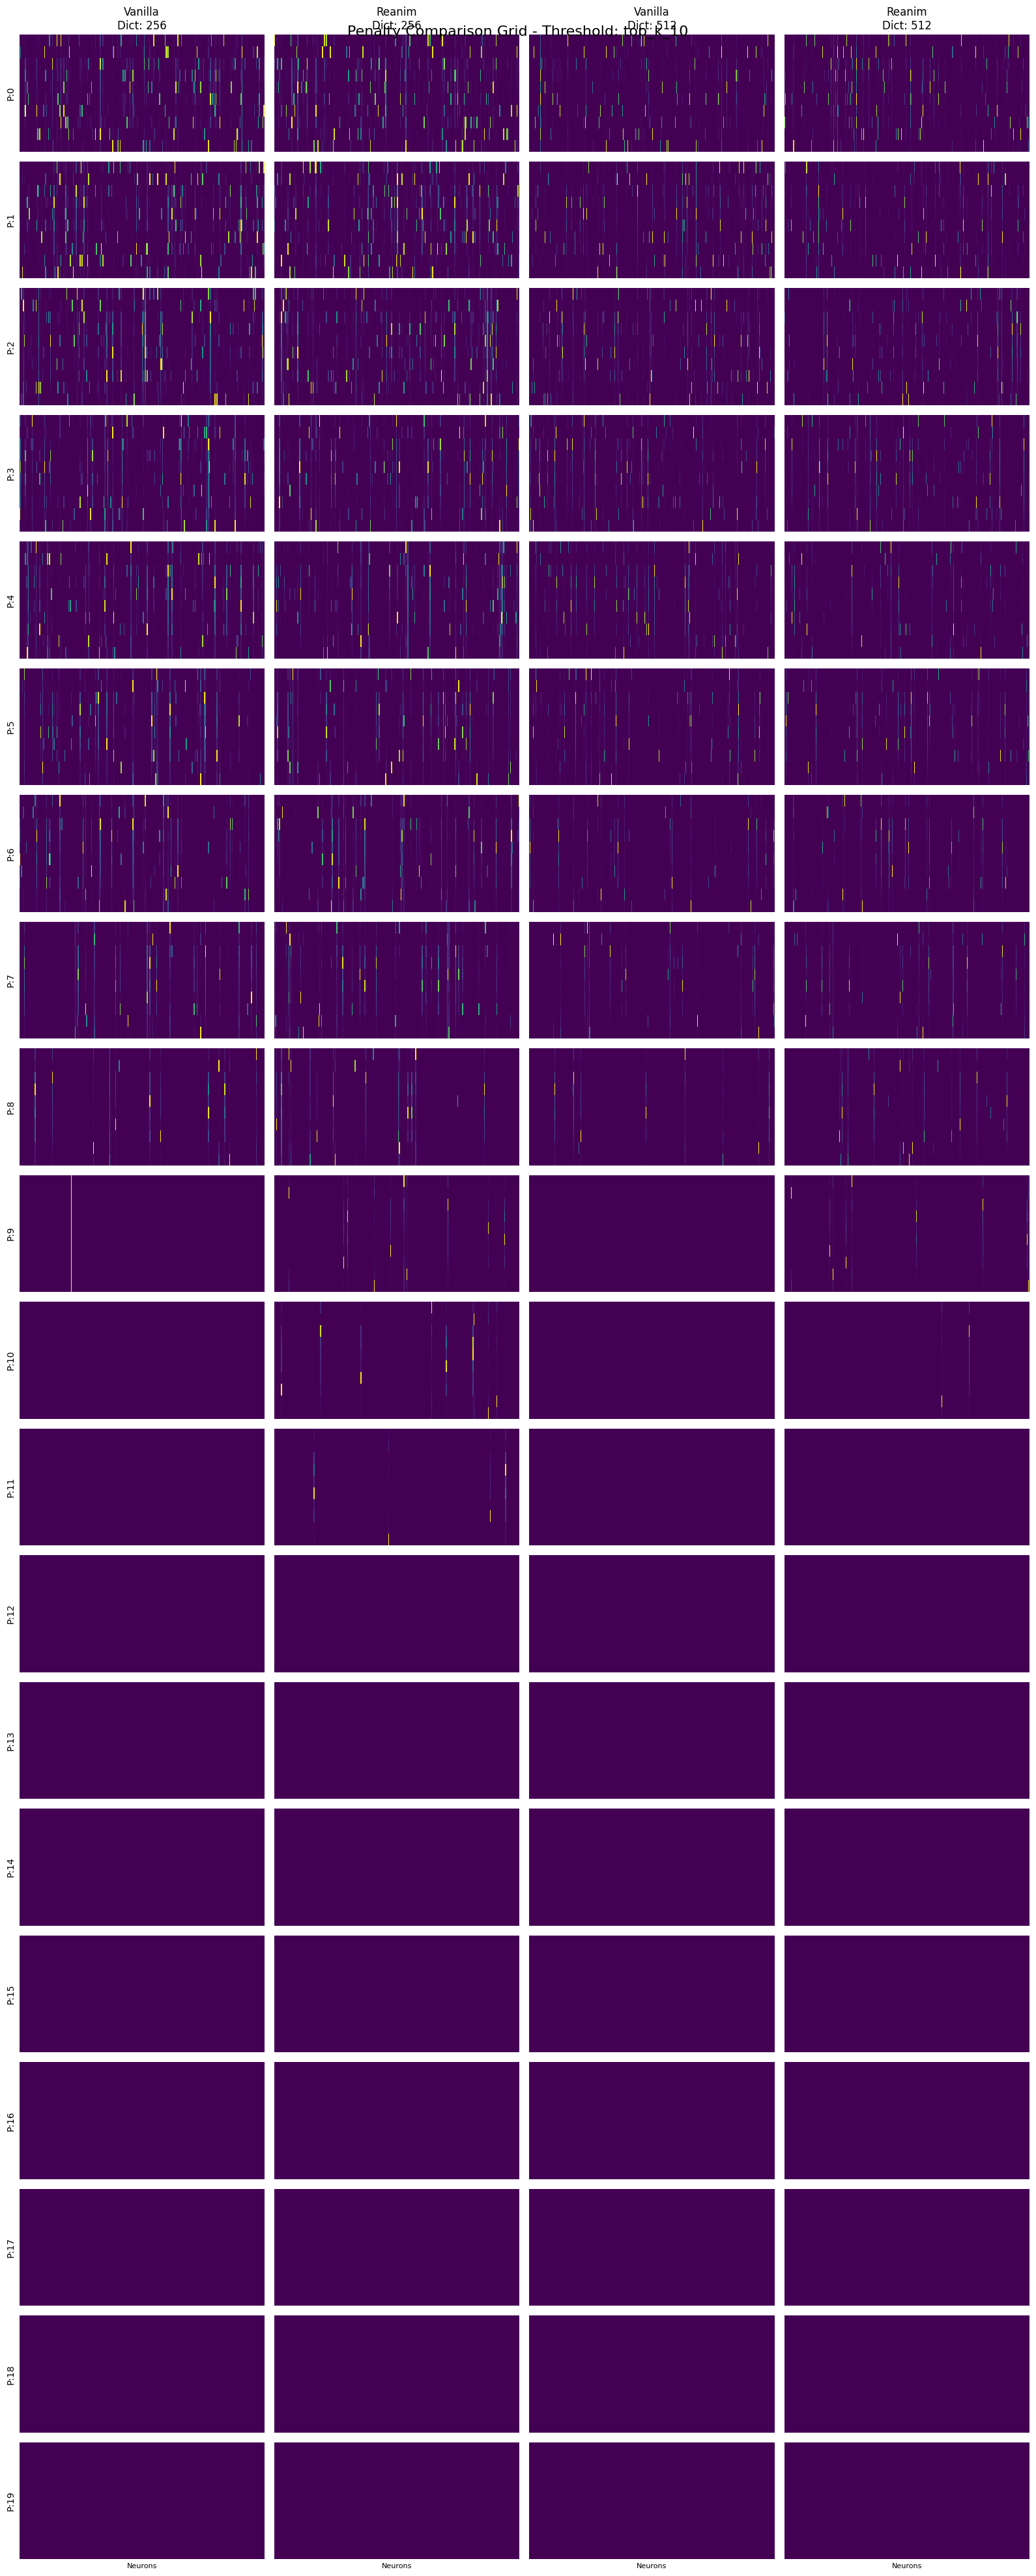

In [1]:
import pickle 

concept_paths_file = "../logs/cifar10_expt2/sae_train_logs/vanilla_sae/concept_paths.pkl"

with open(concept_paths_file, 'rb') as f:
    all_concept_paths = pickle.load(f)

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

def parse_sae_name(sae_name):
    name = sae_name.replace('_best_loss', '')
    has_reanim = name.startswith('reanim_')
    if has_reanim:
        name = name[7:]
    parts = name.split('_')
    # print(parts)
    if len(parts) >= 4 and parts[0] == 'vanilla' and parts[1] == 'sae':
        try:
            dict_size = int(parts[2])
            penalty = int(parts[3])
            return has_reanim, dict_size, penalty
        except ValueError:
            pass
    return has_reanim, None, None

def plot_neuron_usage_heatmap(concept_paths, summary, title_prefix=""):
    """
    Analyzes concept paths and generates a heatmap of neuron usage per digit.
    """
    num_neurons = summary.get('n_neurons', 256)
    num_classes = 10  # Assuming digits 0-9
    
    # Matrix to store the frequency of each neuron's activation for each class
    neuron_usage_matrix = np.zeros((num_classes, num_neurons))
    samples_per_class = defaultdict(int)
    
    # Populate the usage matrix
    for path in concept_paths:
        label = path.get('label')
        if label is not None and 0 <= label < num_classes:
            samples_per_class[label] += 1
            for neuron_idx in path['active_neurons']:
                if 0 <= neuron_idx < num_neurons:
                    neuron_usage_matrix[label, neuron_idx] += 1
    
    # Normalize by the number of samples to get activation frequency
    for i in range(num_classes):
        if samples_per_class[i] > 0:
            neuron_usage_matrix[i, :] /= samples_per_class[i]
    
    # Plotting the heatmap
    plt.figure(figsize=(20, 8))
    sns.heatmap(neuron_usage_matrix, cmap='viridis', yticklabels=range(num_classes))
    plt.xlabel('Neuron Index', fontsize=12)
    plt.ylabel('Digit', fontsize=12)
    plt.title(f'{title_prefix}\nNeuron Activation Frequency per Digit', fontsize=14)
    plt.show()

def group_and_plot_saes(all_concept_paths, thresh_type_filter=None):
    """
    Group SAEs by has_reanim and dictionary_size, then plot sorted by penalty_type.
    
    Args:
        all_concept_paths: Dictionary containing all SAE results
        thresh_type_filter: Optional filter for threshold type (e.g., 'top_k_10')
    """
    # Group SAEs by (has_reanim, dictionary_size)
    grouped_saes = defaultdict(list)
    
    for sae_name, results_by_thresh in all_concept_paths.items():
        
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        
        if dict_size is None or penalty is None:
            continue
            
        # Store the SAE info with its results
        sae_info = {
            'sae_name': sae_name,
            'has_reanim': has_reanim,
            'dict_size': dict_size,
            'penalty': penalty,
            'results_by_thresh': results_by_thresh
        }
        
        grouped_saes[(has_reanim, dict_size)].append(sae_info)
    
    # Sort and plot for each group
    for (has_reanim, dict_size), sae_list in sorted(grouped_saes.items()):
        reanim_label = "Reanim" if has_reanim else "Vanilla"
        print(f"\nProcessing group: {reanim_label}, Dictionary Size: {dict_size}")
        
        # Sort by penalty (0 to 20)
        sae_list_sorted = sorted(sae_list, key=lambda x: x['penalty'])
        
        # Filter penalty types 0-20 if needed
        sae_list_filtered = [sae for sae in sae_list_sorted if 0 <= sae['penalty'] <= 20]
        
        print(f"Found {len(sae_list_filtered)} SAEs with penalty types 0-20")
        
        # Plot each SAE in this group
        for sae_info in sae_list_filtered:
            sae_name = sae_info['sae_name']
            penalty = sae_info['penalty']
            results_by_thresh = sae_info['results_by_thresh']
            
            for thresh_type, data in results_by_thresh.items():
                # Apply threshold filter if specified
                if thresh_type_filter and thresh_type != thresh_type_filter:
                    continue
                    
                if 'concept_paths' in data and 'summary' in data:
                    title = f"{reanim_label}, Dict Size: {dict_size}, Penalty: {penalty}, Thresh: {thresh_type}"
                    plot_neuron_usage_heatmap(data['concept_paths'], data['summary'], title_prefix=title)

def plot_penalty_comparison_grid(all_concept_paths, thresh_type='top_k_10', max_penalty=19):
    """
    Create a 20x4 grid comparison where columns are groups (has_reanim, dict_size combinations)
    and rows are penalty values (0-19).
    
    Args:
        all_concept_paths: Dictionary containing all SAE results
        thresh_type: Threshold type to use for comparison
        max_penalty: Maximum penalty value to include (default 19 for 0-19 range)
    """
    # Group SAEs by (has_reanim, dict_size)
    grouped_saes = defaultdict(dict)  # {(has_reanim, dict_size): {penalty: sae_info}}
    
    for sae_name, results_by_thresh in all_concept_paths.items():
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if dict_size is None or penalty is None:
            continue
        if penalty > max_penalty:
            continue
        if thresh_type not in results_by_thresh:
            continue
        
        data = results_by_thresh[thresh_type]
        if 'concept_paths' not in data or 'summary' not in data:
            continue
            
        sae_info = {
            'sae_name': sae_name,
            'penalty': penalty,
            'data': data
        }
        
        grouped_saes[(has_reanim, dict_size)][penalty] = sae_info
    
    # Get all available groups and sort them
    all_groups = sorted(grouped_saes.keys())
    n_groups = len(all_groups)
    
    if n_groups == 0:
        print("No valid SAE groups found")
        return
    
    print(f"Found {n_groups} groups:")
    for has_reanim, dict_size in all_groups:
        reanim_label = "Reanim" if has_reanim else "Vanilla"
        penalties = sorted(grouped_saes[(has_reanim, dict_size)].keys())
        print(f"  {reanim_label}, Dict Size: {dict_size}, Penalties: {penalties}")
    
    # Create the grid: 20 rows (penalties 0-19) x n_groups columns
    n_penalties = max_penalty + 1  # 0 to max_penalty inclusive
    fig, axes = plt.subplots(n_penalties, n_groups, figsize=(4*n_groups, 2*n_penalties))
    
    # Handle case where we have only one group or one penalty
    if n_groups == 1 and n_penalties == 1:
        axes = [[axes]]
    elif n_groups == 1:
        axes = [[ax] for ax in axes]
    elif n_penalties == 1:
        axes = [axes]
    
    fig.suptitle(f'Penalty Comparison Grid - Threshold: {thresh_type}', fontsize=16)
    
    # Create column labels
    for col_idx, (has_reanim, dict_size) in enumerate(all_groups):
        reanim_label = "Reanim" if has_reanim else "Vanilla"
        axes[0][col_idx].set_title(f'{reanim_label}\nDict: {dict_size}', fontsize=12)
    
    # Fill the grid
    for penalty in range(n_penalties):
        for col_idx, (has_reanim, dict_size) in enumerate(all_groups):
            ax = axes[penalty][col_idx]
            
            # Check if we have data for this penalty and group
            group_data = grouped_saes.get((has_reanim, dict_size), {})
            sae_info = group_data.get(penalty)
            
            if sae_info is not None:
                # We have data - plot the heatmap
                data = sae_info['data']
                concept_paths = data['concept_paths']
                summary = data['summary']
                
                # Calculate neuron usage matrix
                num_neurons = summary.get('n_neurons', 256)
                num_classes = 10
                neuron_usage_matrix = np.zeros((num_classes, num_neurons))
                samples_per_class = defaultdict(int)
                
                for path in concept_paths:
                    label = path.get('label')
                    if label is not None and 0 <= label < num_classes:
                        samples_per_class[label] += 1
                        for neuron_idx in path['active_neurons']:
                            if 0 <= neuron_idx < num_neurons:
                                neuron_usage_matrix[label, neuron_idx] += 1
                
                for i in range(num_classes):
                    if samples_per_class[i] > 0:
                        neuron_usage_matrix[i, :] /= samples_per_class[i]
                
                # Plot heatmap (no colorbar for individual subplots to save space)
                sns.heatmap(neuron_usage_matrix, cmap='viridis', 
                           yticklabels=False, xticklabels=False, ax=ax, cbar=False)
                
            else:
                # No data available - show empty plot
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=10, alpha=0.5)
                ax.set_xticks([])
                ax.set_yticks([])
            
            # Add penalty label on the left column
            if col_idx == 0:
                ax.set_ylabel(f'P:{penalty}', fontsize=10)
            else:
                ax.set_ylabel('')
            
            # Remove x-axis labels except for bottom row
            if penalty < n_penalties - 1:
                ax.set_xlabel('')
            else:
                ax.set_xlabel('Neurons', fontsize=8)
    
    plt.tight_layout()
    plt.show()

def plot_penalty_comparison_grid_specific_groups(all_concept_paths, groups_to_plot, thresh_type='top_k_10', max_penalty=19):
    """
    Create a 20x4 grid for specific groups.
    
    Args:
        all_concept_paths: Dictionary containing all SAE results
        groups_to_plot: List of (has_reanim, dict_size) tuples to include
        thresh_type: Threshold type to use for comparison
        max_penalty: Maximum penalty value to include (default 19 for 0-19 range)
    """
    # Group SAEs by (has_reanim, dict_size)
    grouped_saes = defaultdict(dict)
    
    for sae_name, results_by_thresh in all_concept_paths.items():
        # print(f'Running: {sae_name}')
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if dict_size is None or penalty is None:
            print(f'sae_name: {sae_name}, skipping dict, pen')
            continue
        if penalty > max_penalty:
            print(f'sae_name: {sae_name}, skipping max pen')
            continue
        if (has_reanim, dict_size) not in groups_to_plot:
            print(f'sae_name: {sae_name}, group')
            continue
        if thresh_type not in results_by_thresh:
            print(f'sae_name: {sae_name}, thresh')
            continue
            
        data = results_by_thresh[thresh_type]
        if 'concept_paths' not in data or 'summary' not in data:
            print(f'sae_name: {sae_name}, summary pen')
            continue
            
        sae_info = {
            'sae_name': sae_name,
            'penalty': penalty,
            'data': data
        }
        
        grouped_saes[(has_reanim, dict_size)][penalty] = sae_info
    
    # Use the specified groups in order
    n_groups = len(groups_to_plot)
    n_penalties = max_penalty + 1
    
    if n_groups == 0:
        print("No groups specified")
        return
        
    print(f"Plotting {n_groups} specified groups:")
    for has_reanim, dict_size in groups_to_plot:
        reanim_label = "Reanim" if has_reanim else "Vanilla"
        penalties = sorted(grouped_saes.get((has_reanim, dict_size), {}).keys())
        print(f"  {reanim_label}, Dict Size: {dict_size}, Available penalties: {penalties}")
    
    # Create the grid
    fig, axes = plt.subplots(n_penalties, n_groups, figsize=(4*n_groups, 2*n_penalties))
    
    # Handle edge cases
    if n_groups == 1 and n_penalties == 1:
        axes = [[axes]]
    elif n_groups == 1:
        axes = [[ax] for ax in axes]
    elif n_penalties == 1:
        axes = [axes]
    
    fig.suptitle(f'Penalty Comparison Grid - Threshold: {thresh_type}', fontsize=16)
    
    # Create column labels
    for col_idx, (has_reanim, dict_size) in enumerate(groups_to_plot):
        reanim_label = "Reanim" if has_reanim else "Vanilla"
        axes[0][col_idx].set_title(f'{reanim_label}\nDict: {dict_size}', fontsize=12)
    
    # Fill the grid
    for penalty in range(n_penalties):
        for col_idx, (has_reanim, dict_size) in enumerate(groups_to_plot):
            ax = axes[penalty][col_idx]
            
            # Check if we have data for this penalty and group
            group_data = grouped_saes.get((has_reanim, dict_size), {})
            sae_info = group_data.get(penalty)
            
            if sae_info is not None:
                # We have data - plot the heatmap
                data = sae_info['data']
                concept_paths = data['concept_paths']
                summary = data['summary']
                
                # Calculate neuron usage matrix
                num_neurons = summary.get('n_neurons', 256)
                num_classes = 10
                neuron_usage_matrix = np.zeros((num_classes, num_neurons))
                samples_per_class = defaultdict(int)
                
                for path in concept_paths:
                    label = path.get('label')
                    if label is not None and 0 <= label < num_classes:
                        samples_per_class[label] += 1
                        for neuron_idx in path['active_neurons']:
                            if 0 <= neuron_idx < num_neurons:
                                neuron_usage_matrix[label, neuron_idx] += 1
                
                for i in range(num_classes):
                    if samples_per_class[i] > 0:
                        neuron_usage_matrix[i, :] /= samples_per_class[i]
                
                # Plot heatmap
                sns.heatmap(neuron_usage_matrix, cmap='viridis', 
                           yticklabels=False, xticklabels=False, ax=ax, cbar=False)
                
            else:
                # No data available
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=10, alpha=0.5)
                ax.set_xticks([])
                ax.set_yticks([])
            
            # Add penalty label on the left column
            if col_idx == 0:
                ax.set_ylabel(f'P:{penalty}', fontsize=10)
            else:
                ax.set_ylabel('')
            
            # Remove x-axis labels except for bottom row
            if penalty < n_penalties - 1:
                ax.set_xlabel('')
            else:
                ax.set_xlabel('Neurons', fontsize=8)
    
    plt.tight_layout()
    plt.show()

groups = [(False, 256), (True, 256), (False, 512), (True, 512)] 
plot_penalty_comparison_grid_specific_groups(all_concept_paths, groups, thresh_type='top_k_10')


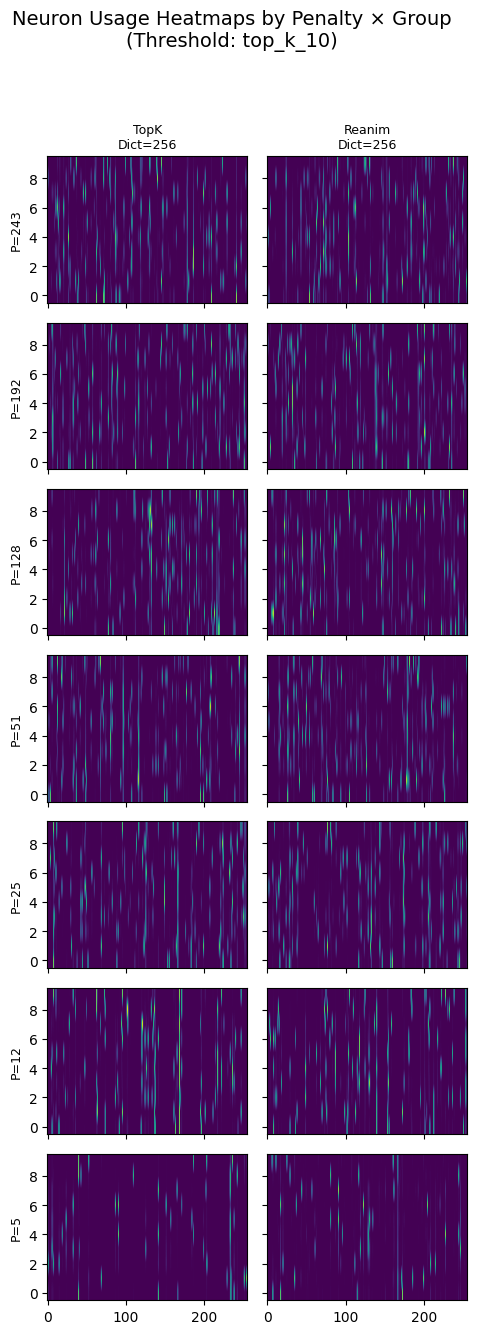

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

concept_paths_file = "../logs/cifar10_expt2/sae_train_logs/topk_sae/concept_paths.pkl"

with open(concept_paths_file, 'rb') as f:
    all_concept_paths = pickle.load(f)

def parse_sae_name(sae_name):
    name = sae_name.replace('_best_loss', '')
    has_reanim = name.startswith('reanim_')
    if has_reanim:
        name = name[7:]
    parts = name.split('_')
    if len(parts) >= 4 and parts[0] == 'topk' and parts[1] == 'sae':
        try:
            dict_size = int(parts[2])
            penalty = int(parts[3])
            return has_reanim, dict_size, penalty
        except ValueError:
            pass
    return has_reanim, None, None

def get_available_penalties(all_concept_paths, groups, thresh_type='top_k_10'):
    penalties_set = set()
    for sae_name, results_by_thresh in all_concept_paths.items():
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if (has_reanim, dict_size) in groups and thresh_type in results_by_thresh:
            penalties_set.add(penalty)
    return sorted(penalties_set, reverse=True) 

def plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10', neuron_limit=256):
    penalties = get_available_penalties(all_concept_paths, groups, thresh_type)
    num_penalties = len(penalties)
    num_groups = len(groups)

    fig, axes = plt.subplots(num_penalties, num_groups, figsize=(2.5 * num_groups, 2 * num_penalties), sharex=True, sharey=True)

    if num_penalties == 1:
        axes = np.expand_dims(axes, axis=0)
    if num_groups == 1:
        axes = np.expand_dims(axes, axis=1)

    for row_idx, penalty in enumerate(penalties):
        for col_idx, (has_reanim, dict_size) in enumerate(groups):
            ax = axes[row_idx][col_idx]
            neuron_digit_matrix = np.zeros((10, neuron_limit))

            # Match the correct SAE key
            for sae_name in all_concept_paths.keys():
                r, d, p = parse_sae_name(sae_name)
                if (r == has_reanim and d == dict_size and p == penalty):
                    if thresh_type not in all_concept_paths[sae_name]:
                        continue
                    data = all_concept_paths[sae_name][thresh_type]['concept_paths']
                    for item in data:
                        digit = item['label']
                        for neuron in item['active_neurons']:
                            if neuron < neuron_limit:
                                neuron_digit_matrix[digit][neuron] += 1
                    break

            im = ax.imshow(neuron_digit_matrix, aspect='auto', cmap='viridis', origin='lower')
            if row_idx == 0:
                reanim_label = "Reanim" if has_reanim else "TopK"
                ax.set_title(f"{reanim_label}\nDict={dict_size}", fontsize=9)
            if col_idx == 0:
                ax.set_ylabel(f"P={penalty}", fontsize=9)

    fig.suptitle(f"Neuron Usage Heatmaps by Penalty × Group\n(Threshold: {thresh_type})", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

groups = [(False, 256), (True, 256)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10')

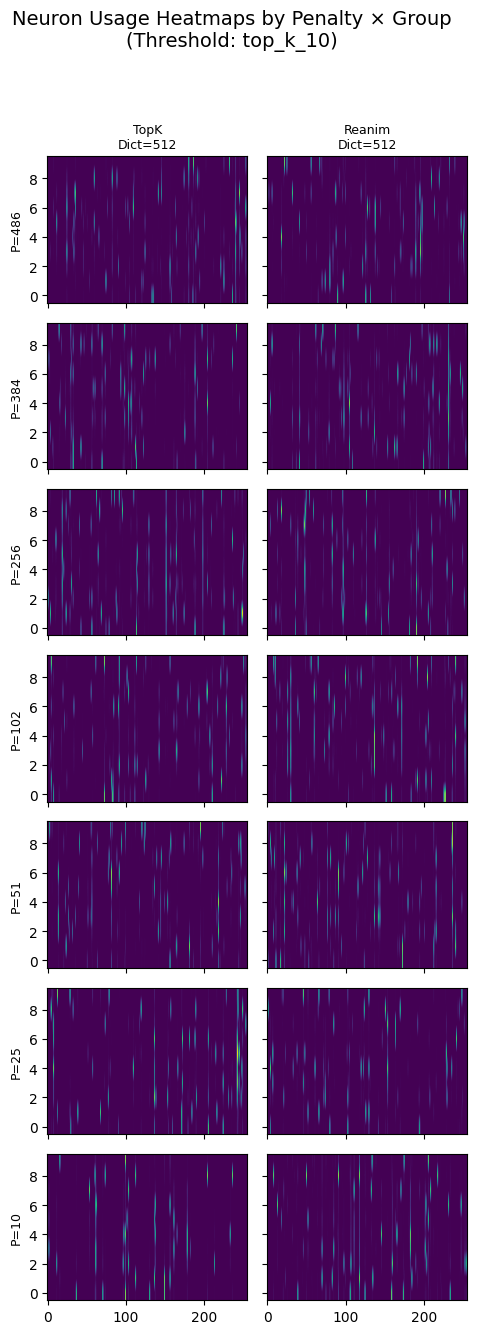

In [3]:
groups = [(False, 512), (True, 512)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10')

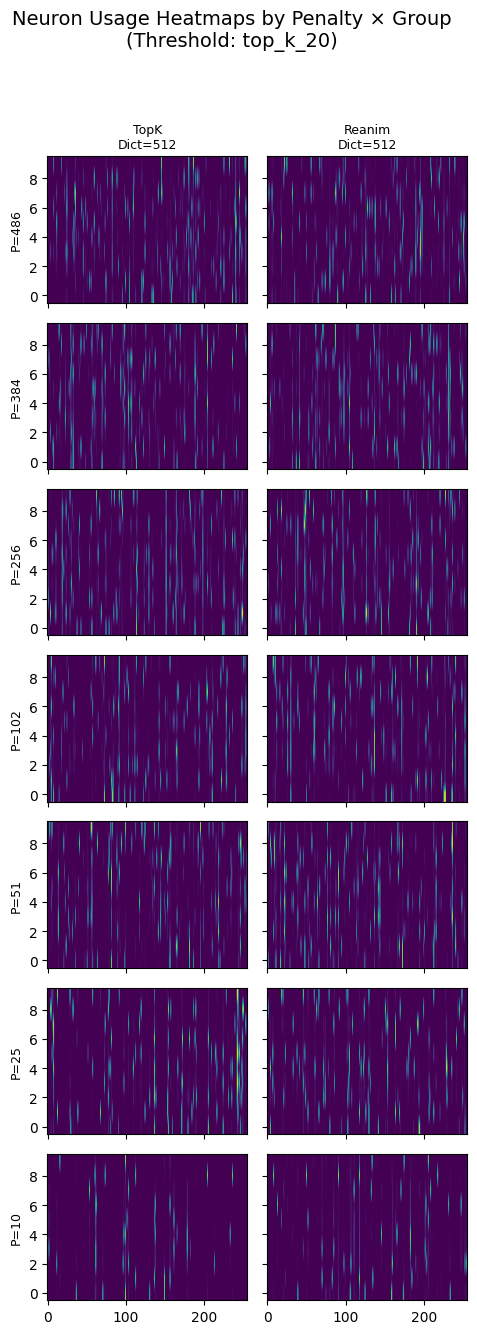

In [4]:
groups = [(False, 512), (True, 512)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_20')